In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from collections import Counter

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv("D:/DS/SpaceTitanic/train.csv")
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


<AxesSubplot:>

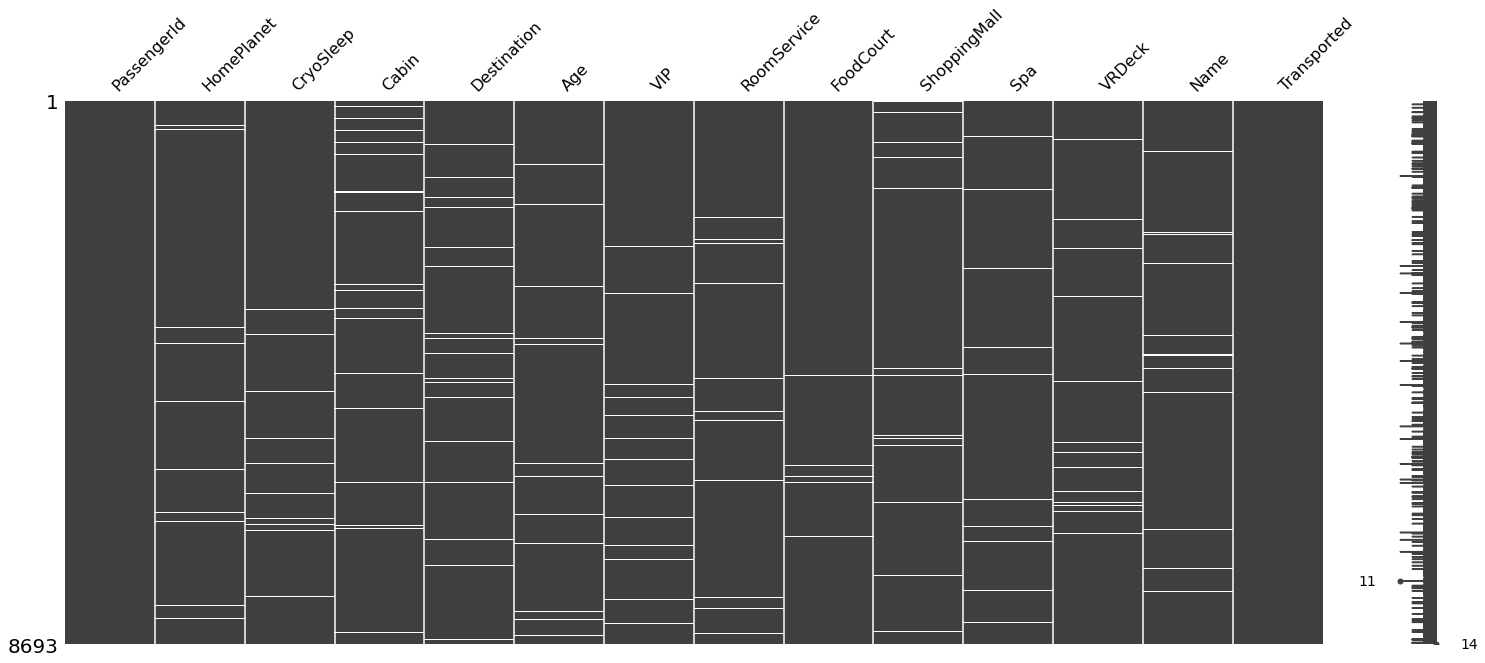

In [5]:
msno.matrix(train)

In [6]:
train.drop(['PassengerId'],axis = 1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [8]:
4602+2131+1759

8492

In [9]:
train['HomePlanet'].fillna('Earth',inplace = True)

In [10]:
train['HomePlanet'].isna().sum()

0

In [11]:
train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
train['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [13]:
5439+3037

8476

In [14]:
train['CryoSleep'].fillna('False',inplace = True)

In [15]:
train['CryoSleep'].isna().sum()

0

In [16]:
train.drop('Cabin',axis = 1, inplace = True)

In [17]:
train.drop('PassengerId', axis = 1, inplace = True)

In [18]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [19]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [20]:
train['Destination'].isna().sum()

182

In [21]:
train['Destination'].fillna('TRAPPIST-1e',inplace = True)

In [22]:
train['Age'].isna().sum()

179

In [23]:
train['Age'].mean()

28.82793046746535

In [24]:
train['Age'].fillna(train['Age'].mean(),inplace = True)

In [25]:
train.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [26]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [27]:
train['VIP'].fillna('False',inplace = True)

In [28]:
train['RoomService'].value_counts()

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64

In [29]:
train['RoomService'].fillna(train['RoomService'].mean(),inplace=True)

In [30]:
train['FoodCourt'].fillna(train['FoodCourt'].mean(),inplace=True)

In [31]:
train['Spa'].fillna(train['Spa'].mean(),inplace=True)

In [32]:
train['VRDeck'].fillna(train['VRDeck'].mean(),inplace=True)

In [33]:
train.drop('Name', axis =1, inplace = True)

In [34]:
train.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall    208
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [35]:
train['ShoppingMall'].fillna(train['ShoppingMall'].mean(),inplace=True)

In [36]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

<AxesSubplot:>

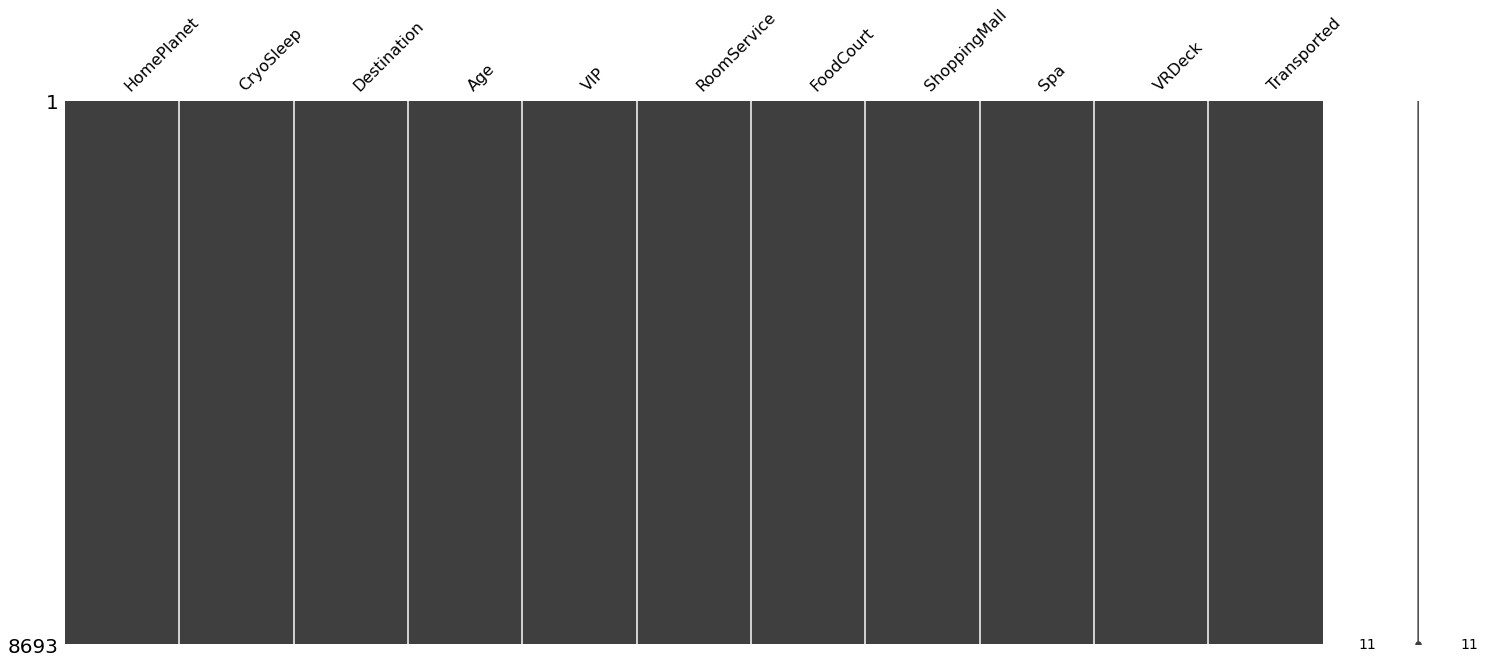

In [37]:
msno.matrix(train)

In [38]:
train.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [39]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## Data Description
- HomePlanet - The planet the passenger departed from
- CryoSleep - If the passenger is in cryosleep
- Destination - Destination Planet
- Age - Age in Years
- VIP - Paid for VIP or not
- RoomService , FoodCourt, ShoppingMall, Spa, VRDeck - Amount spent on respective amenities
- Transported - If the passenger was transported to another dimension or noyt

In [40]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Categorical Variables
- HomePlanet
- Destination

<AxesSubplot:>

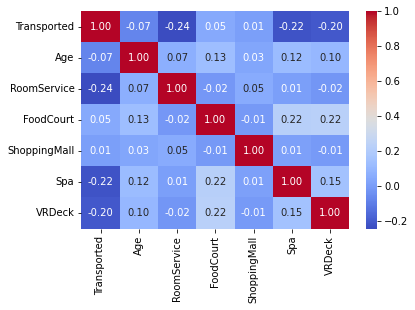

In [41]:
sns.heatmap(train[['Transported','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].corr(),annot = True, fmt = '.2f', cmap = 'coolwarm')

Text(0.5, 1.0, 'Passenger Age Dis')

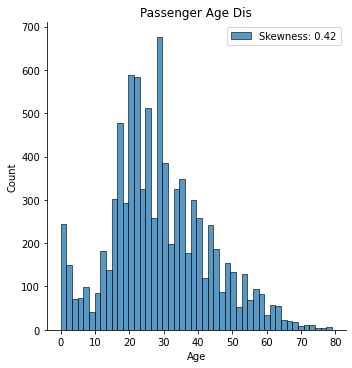

In [42]:
sns.displot(train['Age'],label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Dis')

## Getting Dummy Columns

In [43]:
train= pd.get_dummies(train, columns = ['HomePlanet'])
train= pd.get_dummies(train, columns = ['Destination'])
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1


In [44]:
train.CryoSleep = train.CryoSleep.replace({True: 1, False: 0})

In [45]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,0,1
1,0,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1
2,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1
3,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1
4,0,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1


In [46]:
train['VIP'].replace({False: 0, True: 1}, inplace=True)

In [47]:
train['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP, Length: 8693, dtype: object

In [50]:
train['VIP'].dtype

dtype('O')

In [51]:
train['VIP'].value_counts()

0        8291
False     203
1         199
Name: VIP, dtype: int64

In [52]:
train['VIP'].replace({'False':0},inplace = True)

In [53]:
train['VIP'].value_counts()

0    8494
1     199
Name: VIP, dtype: int64

In [54]:
train.Transported = train.Transported.replace({True: 1, False: 0})

In [55]:
train['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP, Length: 8693, dtype: int64

In [56]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1


In [57]:
train['Age'] = train['Age'].astype('int')
train['RoomService'] = train['RoomService'].astype('int')
train['FoodCourt'] = train['FoodCourt'].astype('int')
train['ShoppingMall'] = train['ShoppingMall'].astype('int')
train['Spa'] = train['Spa'].astype('int')
train['VRDeck'] = train['VRDeck'].astype('int')

In [58]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,24,0,109,9,25,549,44,1,1,0,0,0,0,1
2,0,58,1,43,3576,0,6715,49,0,0,1,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,0,1,0,0,0,1
4,0,16,0,303,70,151,565,2,1,1,0,0,0,0,1


In [59]:
x = train.iloc[:,1:].drop('Transported',axis = 1)
y = train['Transported']
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [60]:
train_x.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
7289,64,0,19,261,208,0,214,1,0,0,1,0,0
2709,24,0,224,2,25,311,707,1,0,0,0,1,0
6803,44,0,0,0,16,72,4304,0,1,0,0,0,1
3731,34,0,0,847,14,0,0,1,0,0,0,0,1
6333,13,0,0,0,0,0,0,0,0,1,0,0,1


In [61]:
test_x.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
3601,16,0,0,0,623,40,209,1,0,0,1,0,0
6057,2,0,0,0,0,0,0,1,0,0,0,0,1
2797,31,0,517,1,301,60,4,1,0,0,0,0,1
7110,14,0,653,0,4,0,0,1,0,0,1,0,0
8579,30,1,0,0,0,0,0,0,1,0,1,0,0


In [62]:
train_y.head()

7289    0
2709    1
6803    0
3731    1
6333    0
Name: Transported, dtype: int64

In [63]:
test_y.head()

3601    1
6057    1
2797    0
7110    0
8579    1
Name: Transported, dtype: int64

In [64]:
train.describe()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.810882,0.022892,224.673300,458.075578,173.711722,311.135856,304.836305,0.503624,0.552514,0.245140,0.202347,0.207063,0.091568,0.701369
std,14.339536,0.149568,659.739371,1594.434978,597.417450,1124.675871,1133.259056,0.500016,0.497263,0.430195,0.401772,0.405224,0.288432,0.457684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,0.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
train['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP, Length: 8693, dtype: int64

In [66]:
lr = LogisticRegression()
lr.fit(train_x,train_y)
lr_predict_y = lr.predict(test_x)
print(classification_report(test_y,lr_predict_y))
print('Accuracy: ',accuracy_score(lr_predict_y,test_y))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76      1303
           1       0.73      0.89      0.80      1305

    accuracy                           0.78      2608
   macro avg       0.79      0.78      0.78      2608
weighted avg       0.79      0.78      0.78      2608

Accuracy:  0.781441717791411


In [67]:
SVC = SVC()
SVC.fit(train_x,train_y)
SVC_predict_y = SVC.predict(test_x)
print(classification_report(test_y,SVC_predict_y))
print('Accuracy: ',accuracy_score(SVC_predict_y,test_y))

              precision    recall  f1-score   support

           0       0.86      0.67      0.76      1303
           1       0.73      0.89      0.80      1305

    accuracy                           0.78      2608
   macro avg       0.80      0.78      0.78      2608
weighted avg       0.80      0.78      0.78      2608

Accuracy:  0.7829754601226994


In [68]:
RF = RandomForestClassifier()
RF.fit(train_x,train_y)
RF_predict_y = RF.predict(test_x)
print(classification_report(test_y,RF_predict_y))
print('Accuracy: ',accuracy_score(RF_predict_y,test_y))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1303
           1       0.78      0.79      0.78      1305

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608

Accuracy:  0.7791411042944786


In [69]:
RF2 = RandomForestClassifier(n_estimators = 150)
RF2.fit(train_x,train_y)
RF2_predict_y = RF2.predict(test_x)
print(classification_report(test_y,RF2_predict_y))
print('Accuracy: ',accuracy_score(RF2_predict_y,test_y))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1303
           1       0.77      0.79      0.78      1305

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608

Accuracy:  0.7772239263803681


In [70]:
knn = KNeighborsClassifier()
knn.fit(train_x,train_y)
knn_predict_y = knn.predict(test_x)
print(classification_report(test_y,knn_predict_y))
print('Accuracy: ',accuracy_score(test_y, knn_predict_y))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1303
           1       0.74      0.79      0.76      1305

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608

Accuracy:  0.7565184049079755


In [71]:
ctb = CatBoostClassifier()
ctb.fit(train_x, train_y)
ctb_pred_y = ctb.predict(test_x)
print(classification_report(test_y,ctb_pred_y))
print('Accuracy: ',accuracy_score(test_y, ctb_pred_y))

Learning rate set to 0.022275
0:	learn: 0.6842047	total: 169ms	remaining: 2m 49s
1:	learn: 0.6735310	total: 172ms	remaining: 1m 26s
2:	learn: 0.6635293	total: 175ms	remaining: 58.2s
3:	learn: 0.6542445	total: 178ms	remaining: 44.4s
4:	learn: 0.6459524	total: 181ms	remaining: 36s
5:	learn: 0.6371309	total: 184ms	remaining: 30.5s
6:	learn: 0.6295921	total: 187ms	remaining: 26.6s
7:	learn: 0.6233819	total: 191ms	remaining: 23.6s
8:	learn: 0.6162667	total: 194ms	remaining: 21.3s
9:	learn: 0.6091268	total: 197ms	remaining: 19.5s
10:	learn: 0.6025624	total: 200ms	remaining: 18s
11:	learn: 0.5965306	total: 203ms	remaining: 16.7s
12:	learn: 0.5898447	total: 206ms	remaining: 15.6s
13:	learn: 0.5839888	total: 209ms	remaining: 14.7s
14:	learn: 0.5792204	total: 211ms	remaining: 13.9s
15:	learn: 0.5741459	total: 214ms	remaining: 13.2s
16:	learn: 0.5691118	total: 217ms	remaining: 12.5s
17:	learn: 0.5639483	total: 220ms	remaining: 12s
18:	learn: 0.5592096	total: 223ms	remaining: 11.5s
19:	learn: 0.55

184:	learn: 0.4263887	total: 705ms	remaining: 3.1s
185:	learn: 0.4260927	total: 708ms	remaining: 3.1s
186:	learn: 0.4259893	total: 711ms	remaining: 3.09s
187:	learn: 0.4258126	total: 713ms	remaining: 3.08s
188:	learn: 0.4256864	total: 716ms	remaining: 3.07s
189:	learn: 0.4255507	total: 719ms	remaining: 3.06s
190:	learn: 0.4253931	total: 722ms	remaining: 3.06s
191:	learn: 0.4252415	total: 725ms	remaining: 3.05s
192:	learn: 0.4251021	total: 728ms	remaining: 3.04s
193:	learn: 0.4249669	total: 730ms	remaining: 3.03s
194:	learn: 0.4248287	total: 734ms	remaining: 3.03s
195:	learn: 0.4246966	total: 736ms	remaining: 3.02s
196:	learn: 0.4245231	total: 739ms	remaining: 3.01s
197:	learn: 0.4243751	total: 742ms	remaining: 3.01s
198:	learn: 0.4242319	total: 745ms	remaining: 3s
199:	learn: 0.4240921	total: 748ms	remaining: 2.99s
200:	learn: 0.4238970	total: 751ms	remaining: 2.98s
201:	learn: 0.4237232	total: 754ms	remaining: 2.98s
202:	learn: 0.4235945	total: 757ms	remaining: 2.97s
203:	learn: 0.423

364:	learn: 0.4060800	total: 1.25s	remaining: 2.18s
365:	learn: 0.4059533	total: 1.25s	remaining: 2.17s
366:	learn: 0.4058365	total: 1.26s	remaining: 2.17s
367:	learn: 0.4056510	total: 1.26s	remaining: 2.17s
368:	learn: 0.4055423	total: 1.27s	remaining: 2.17s
369:	learn: 0.4054397	total: 1.27s	remaining: 2.16s
370:	learn: 0.4053438	total: 1.27s	remaining: 2.16s
371:	learn: 0.4052633	total: 1.28s	remaining: 2.16s
372:	learn: 0.4051299	total: 1.28s	remaining: 2.15s
373:	learn: 0.4050953	total: 1.28s	remaining: 2.15s
374:	learn: 0.4050225	total: 1.29s	remaining: 2.15s
375:	learn: 0.4049285	total: 1.29s	remaining: 2.14s
376:	learn: 0.4048228	total: 1.29s	remaining: 2.14s
377:	learn: 0.4047820	total: 1.3s	remaining: 2.13s
378:	learn: 0.4047073	total: 1.3s	remaining: 2.13s
379:	learn: 0.4046003	total: 1.3s	remaining: 2.13s
380:	learn: 0.4045126	total: 1.31s	remaining: 2.12s
381:	learn: 0.4044661	total: 1.31s	remaining: 2.12s
382:	learn: 0.4044075	total: 1.31s	remaining: 2.11s
383:	learn: 0.4

535:	learn: 0.3903223	total: 1.79s	remaining: 1.55s
536:	learn: 0.3902340	total: 1.8s	remaining: 1.55s
537:	learn: 0.3901530	total: 1.8s	remaining: 1.55s
538:	learn: 0.3901017	total: 1.8s	remaining: 1.54s
539:	learn: 0.3899991	total: 1.81s	remaining: 1.54s
540:	learn: 0.3898848	total: 1.81s	remaining: 1.54s
541:	learn: 0.3897634	total: 1.81s	remaining: 1.53s
542:	learn: 0.3897139	total: 1.82s	remaining: 1.53s
543:	learn: 0.3896177	total: 1.82s	remaining: 1.52s
544:	learn: 0.3895167	total: 1.82s	remaining: 1.52s
545:	learn: 0.3894677	total: 1.83s	remaining: 1.52s
546:	learn: 0.3894088	total: 1.83s	remaining: 1.51s
547:	learn: 0.3892463	total: 1.83s	remaining: 1.51s
548:	learn: 0.3891626	total: 1.84s	remaining: 1.51s
549:	learn: 0.3890563	total: 1.84s	remaining: 1.5s
550:	learn: 0.3889937	total: 1.84s	remaining: 1.5s
551:	learn: 0.3889505	total: 1.84s	remaining: 1.5s
552:	learn: 0.3888435	total: 1.85s	remaining: 1.49s
553:	learn: 0.3887444	total: 1.85s	remaining: 1.49s
554:	learn: 0.3886

708:	learn: 0.3749568	total: 2.34s	remaining: 961ms
709:	learn: 0.3749182	total: 2.34s	remaining: 958ms
710:	learn: 0.3747973	total: 2.35s	remaining: 954ms
711:	learn: 0.3747675	total: 2.35s	remaining: 951ms
712:	learn: 0.3747257	total: 2.35s	remaining: 948ms
713:	learn: 0.3746631	total: 2.36s	remaining: 944ms
714:	learn: 0.3745533	total: 2.36s	remaining: 941ms
715:	learn: 0.3744890	total: 2.36s	remaining: 938ms
716:	learn: 0.3744133	total: 2.37s	remaining: 934ms
717:	learn: 0.3743080	total: 2.37s	remaining: 931ms
718:	learn: 0.3742740	total: 2.37s	remaining: 928ms
719:	learn: 0.3741429	total: 2.38s	remaining: 925ms
720:	learn: 0.3740765	total: 2.38s	remaining: 921ms
721:	learn: 0.3739265	total: 2.38s	remaining: 918ms
722:	learn: 0.3738189	total: 2.39s	remaining: 914ms
723:	learn: 0.3736229	total: 2.39s	remaining: 911ms
724:	learn: 0.3735376	total: 2.39s	remaining: 908ms
725:	learn: 0.3734206	total: 2.4s	remaining: 904ms
726:	learn: 0.3733502	total: 2.4s	remaining: 901ms
727:	learn: 0.

881:	learn: 0.3601432	total: 2.88s	remaining: 385ms
882:	learn: 0.3600638	total: 2.88s	remaining: 382ms
883:	learn: 0.3599652	total: 2.89s	remaining: 379ms
884:	learn: 0.3599109	total: 2.89s	remaining: 376ms
885:	learn: 0.3598204	total: 2.89s	remaining: 372ms
886:	learn: 0.3597501	total: 2.9s	remaining: 369ms
887:	learn: 0.3596573	total: 2.9s	remaining: 366ms
888:	learn: 0.3596070	total: 2.9s	remaining: 363ms
889:	learn: 0.3595345	total: 2.91s	remaining: 359ms
890:	learn: 0.3594588	total: 2.91s	remaining: 356ms
891:	learn: 0.3593727	total: 2.91s	remaining: 353ms
892:	learn: 0.3593418	total: 2.92s	remaining: 349ms
893:	learn: 0.3592771	total: 2.92s	remaining: 346ms
894:	learn: 0.3592245	total: 2.92s	remaining: 343ms
895:	learn: 0.3591328	total: 2.92s	remaining: 340ms
896:	learn: 0.3590562	total: 2.93s	remaining: 336ms
897:	learn: 0.3589416	total: 2.93s	remaining: 333ms
898:	learn: 0.3588365	total: 2.94s	remaining: 330ms
899:	learn: 0.3587284	total: 2.94s	remaining: 326ms
900:	learn: 0.3

In [72]:
lsvc = LinearSVC()
lsvc.fit(train_x,train_y)
lsvc_pred_y = lsvc.predict(test_x)
print(classification_report(test_y,lsvc_pred_y))
print('Accuracy: ',accuracy_score(test_y, lsvc_pred_y))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1303
           1       0.68      0.83      0.75      1305

    accuracy                           0.72      2608
   macro avg       0.73      0.72      0.72      2608
weighted avg       0.73      0.72      0.72      2608

Accuracy:  0.7227760736196319
